In [235]:
import pandas as pd
%matplotlib inline

In [236]:
df = pd.read_csv('../../../res/credit-card/training.csv')
df = df.drop(columns=["CUST_ID"])

In [237]:
# Detect Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

BALANCE                              569
BALANCE_FREQUENCY                   1177
PURCHASES                            626
ONEOFF_PURCHASES                     792
INSTALLMENTS_PURCHASES               712
CASH_ADVANCE                         824
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           631
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               287
CASH_ADVANCE_TRX                     640
PURCHASES_TRX                        615
CREDIT_LIMIT                         170
PAYMENTS                             648
MINIMUM_PAYMENTS                     605
PRC_FULL_PAYMENT                    1194
TENURE                              1091
dtype: int64

In [238]:
# # Scale continuous features to give all features with equal importance
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# mms.fit(df)
# data_transformed = mms.transform(df)


In [239]:
# Scale data
from sklearn.preprocessing import StandardScaler
data_transformed = StandardScaler().fit_transform(df)

In [240]:
# Reduce dimensions
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
data_transformed = pca_2.fit_transform(data_transformed)

2

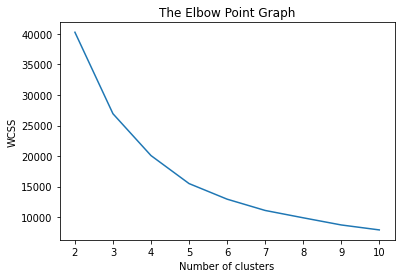

In [241]:
# Elbow Point Graph
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
wcss = []
kmeans_arr = []
for i in range(2, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   kmeans.fit(data_transformed)
   kmeans_arr.append(kmeans)
   wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.46059528331331834
For n_clusters = 3 The average silhouette_score is : 0.45293057686066324
For n_clusters = 4 The average silhouette_score is : 0.4080714026670152
For n_clusters = 5 The average silhouette_score is : 0.4019615237733489
For n_clusters = 6 The average silhouette_score is : 0.3836792824022474
For n_clusters = 7 The average silhouette_score is : 0.3724717123141254
For n_clusters = 8 The average silhouette_score is : 0.38830325763777257
For n_clusters = 9 The average silhouette_score is : 0.37515551910581973
For n_clusters = 10 The average silhouette_score is : 0.36601186985722284


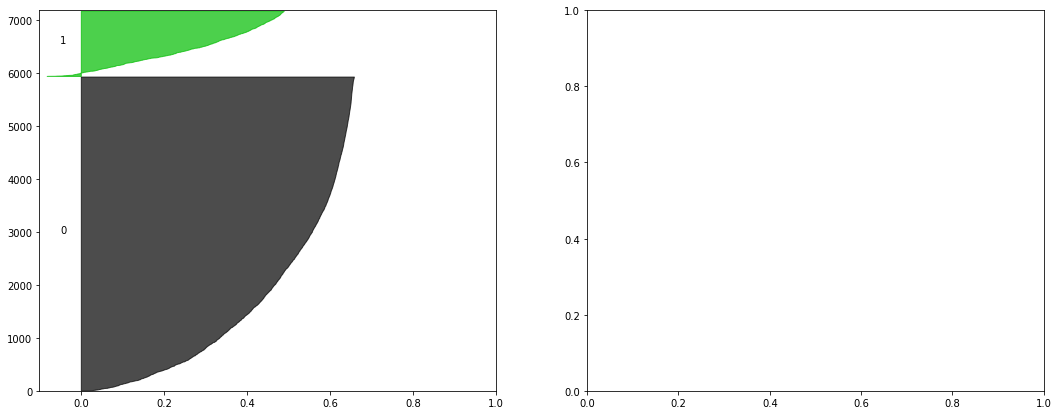

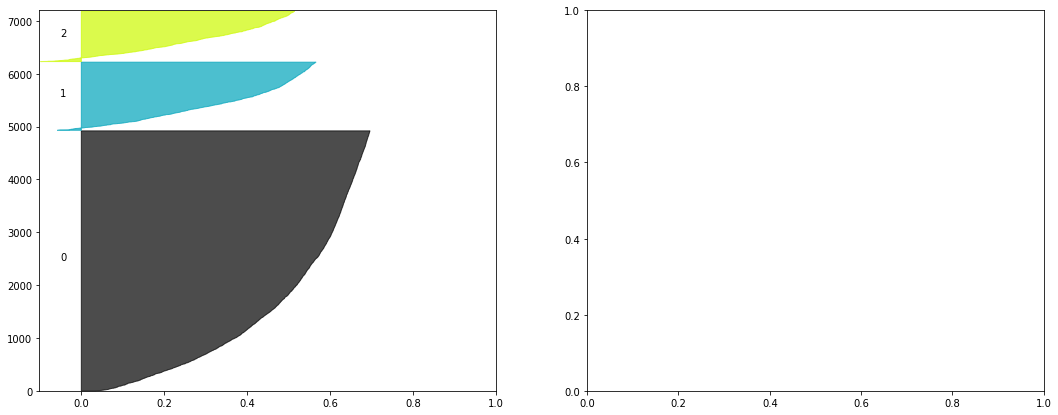

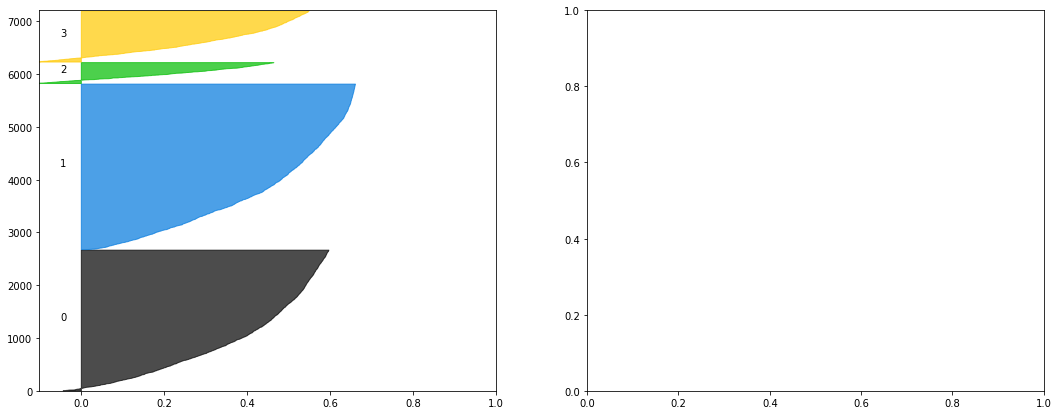

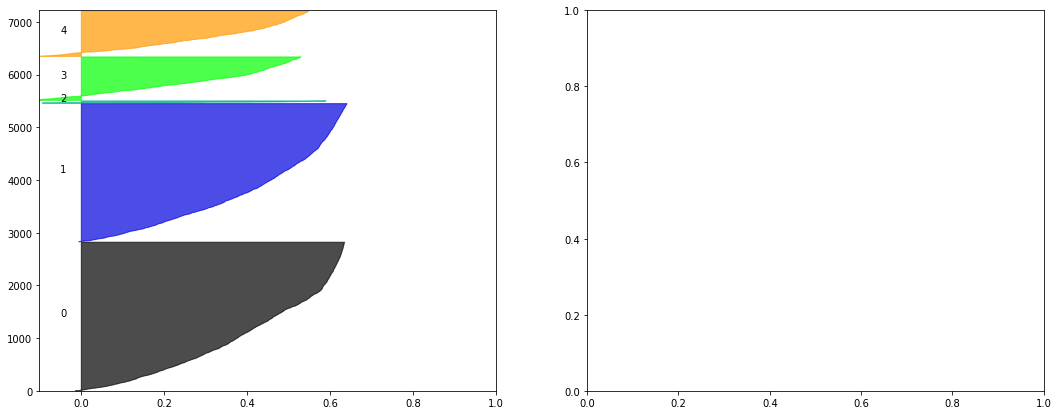

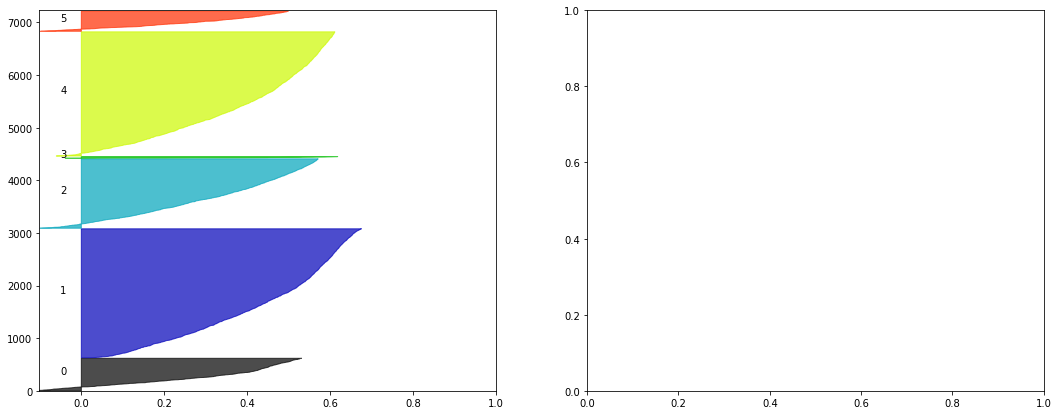

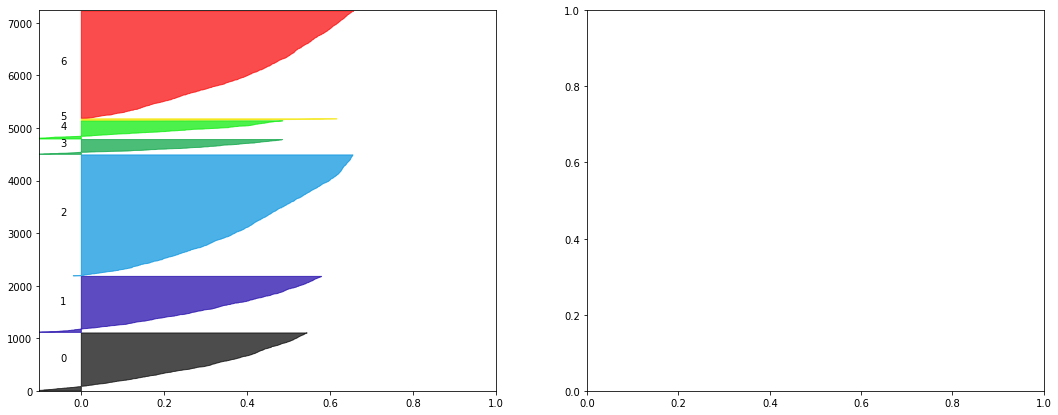

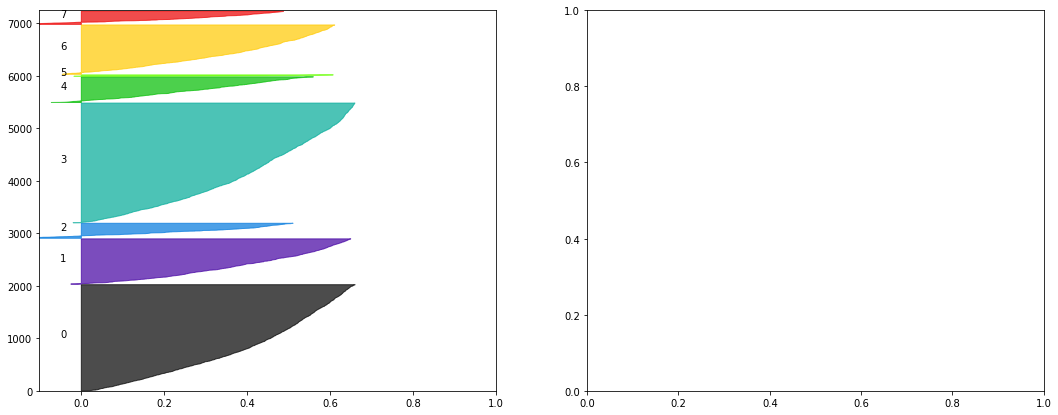

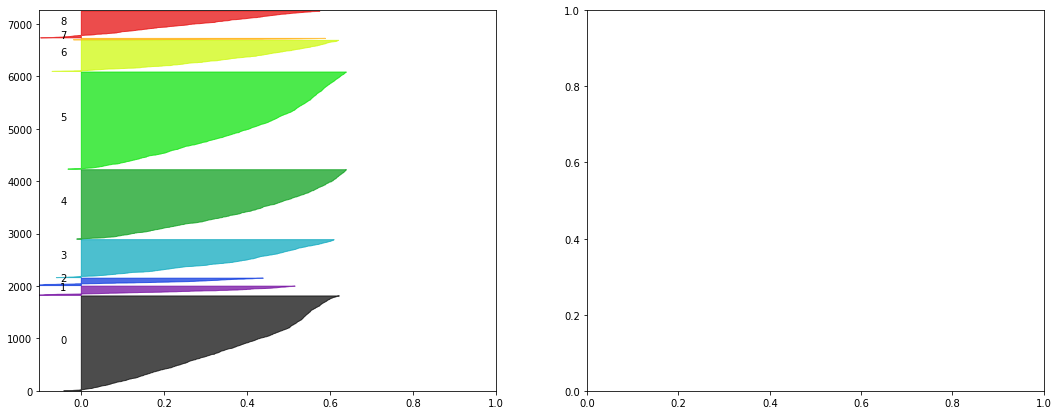

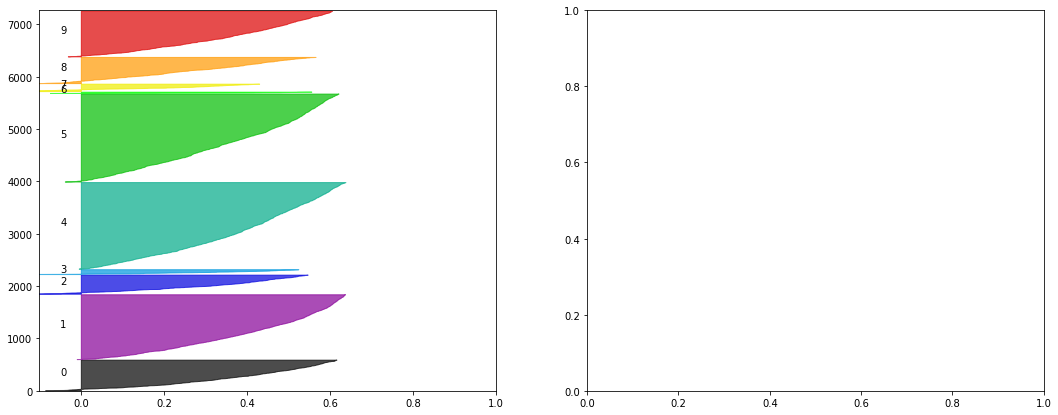

In [242]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
for n_clusters, kmeans in enumerate(kmeans_arr):
    # Add 2 two n_clusters since enumerate gives index 0 at the beginning
    # but the first Kmeans has 1 centroid
    if n_clusters >= 0:
        n_clusters = n_clusters + 2
   # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])

    cluster_labels = kmeans.predict(data_transformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(
        data_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


In [243]:
# # Scale continuous features to give all features with equal importance
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# mms.fit(df)
# np_scaled = mms.transform(df)
# df_scaled = pd.DataFrame(np_scaled)
# df.head()
# df_scaled.head()


In [244]:
# from sklearn.preprocessing import StandardScaler

# Scale data
# np_scaled = StandardScaler().fit_transform(df)
# df_scaled = pd.DataFrame(np_scaled)

# len(df_scaled[0])

In [245]:
# # Reduce dimensions
# from sklearn.decomposition import PCA
# pca_2 = PCA(n_components=2)
# data = pca_2.fit_transform(df_scaled)
# len(data[0])

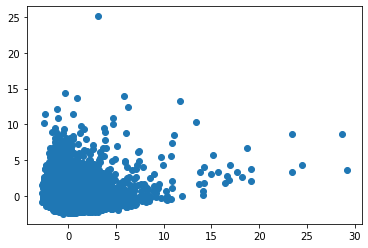

In [249]:
plt.scatter(data_transformed[:,0],data_transformed[:,1], cmap='rainbow')
plt.show()

In [250]:
# Creation of Kmeans model
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Get cluster of each row in dataframe
clusters = km.fit_predict(data_transformed)


In [252]:
print("\nLabel Clusters: ")
print(np.unique(clusters))

# Count all occurences of unique values in clusters
counts = np.bincount(clusters)
print("\nCount Occurrences per Clusters: ")
print(counts)

# Get centroid of each cluster
centroids = km.cluster_centers_
print("\nx,y of Centroids per cluster: ")
print(centroids)

# Append new column in dataframe
df["cluster"] = clusters

# The last column corresponds to the cluster the row is categorized in
df.head()


Label Clusters: 
[0 1 2]

Count Occurrences per Clusters: 
[ 951 4919 1289]

x,y of Centroids per cluster: 
[[ 3.93326971 -0.14168219]
 [-0.55182177 -0.74823913]
 [-0.79587601  2.95703862]]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,947.223495,1.000000,0.00,0.0,0.00,648.548716,0.000000,0.000000,0.000000,0.250000,3,0,6500.0,2415.827922,3933.230932,0.000000,12,1
1,21.966399,0.818182,109.16,35.0,74.16,0.000000,0.666667,0.083333,0.666667,0.000000,0,9,4000.0,125.832337,122.697020,0.181818,12,1
2,27.202031,1.000000,538.41,0.0,538.41,0.000000,1.000000,0.000000,1.000000,0.000000,0,15,1500.0,458.430924,100.747103,0.400000,12,1
3,1923.886805,1.000000,1887.64,0.0,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12,0
4,304.309784,1.000000,289.75,0.0,289.75,0.000000,0.500000,0.000000,0.416667,0.000000,0,7,2500.0,670.652889,177.079948,0.000000,12,1


Clustered Visualization: 
Black point - Centroid


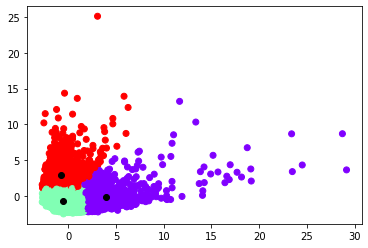

In [255]:
plt.scatter(data_transformed[:,0],data_transformed[:,1], c=km.labels_ ,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')
print("Clustered Visualization: ")
print("Black point - Centroid")
plt.show()